<a href="https://colab.research.google.com/github/Muneeb2k1/DEP/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv('/content/Retail_Transaction_Dataset.csv')

In [ ]:
print(data.head())
print(data.tail())

   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677100   455.862764  
1           

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB
None


In [ ]:
data.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

In [ ]:
data.isnull().sum()

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

In [ ]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
print(data.describe())

          CustomerID       Quantity          Price  DiscountApplied(%)  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean   500463.982180       5.009290      55.067344           10.020155   
std    288460.917524       2.579808      25.971567            5.779534   
min        14.000000       1.000000      10.000430            0.000046   
25%    250693.750000       3.000000      32.549474            5.001013   
50%    499679.000000       5.000000      55.116789           10.030353   
75%    751104.750000       7.000000      77.456763           15.018367   
max    999997.000000       9.000000      99.999284           19.999585   

         TotalAmount  
count  100000.000000  
mean      248.334955  
std       184.554792  
min         8.274825  
25%        95.163418  
50%       200.368393  
75%       362.009980  
max       896.141242  


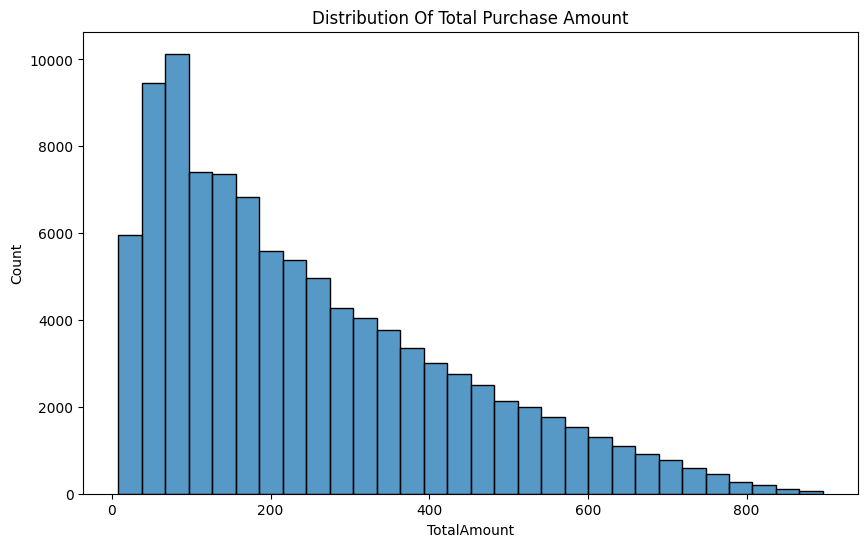

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['TotalAmount'], bins=30)
plt.title('Distribution Of Total Purchase Amount')
plt.show()

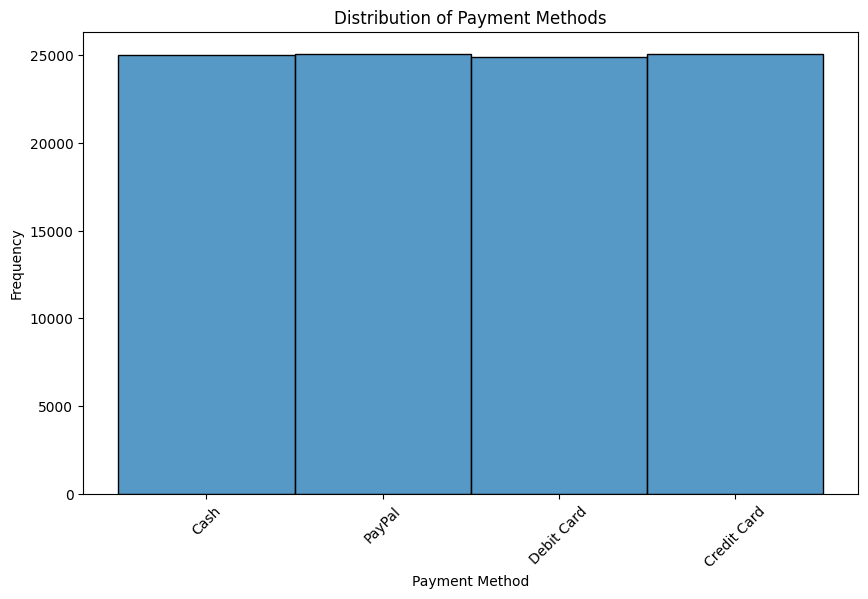

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PaymentMethod'], bins = 30)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

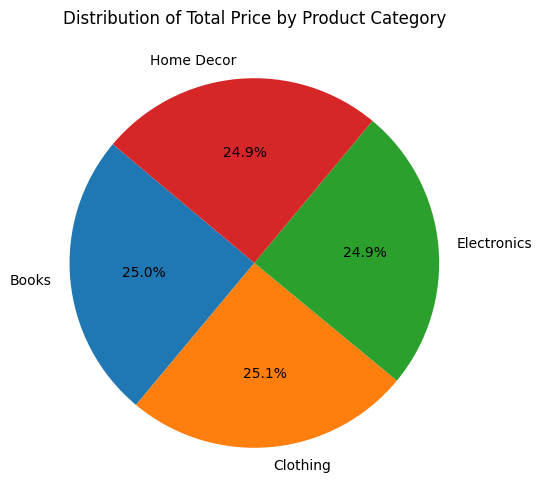

In [ ]:
pie_chart = data.groupby('ProductCategory')['Price'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(pie_chart['Price'], labels=pie_chart['ProductCategory'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Price by Product Category')
plt.show()

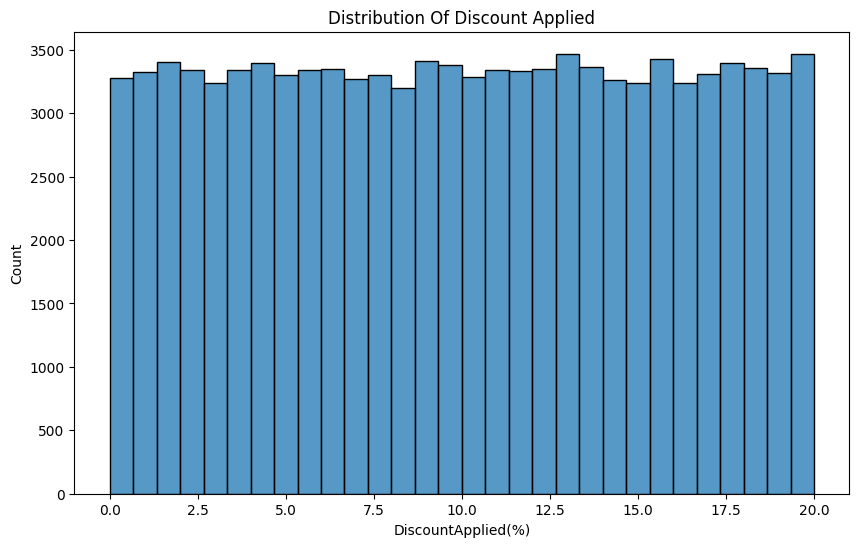

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(data['DiscountApplied(%)'], bins=30)
plt.title('Distribution Of Discount Applied')
plt.show()

In [ ]:
data['State'] = [loc[-8:-6] for loc in data['StoreLocation']]
data['State'].value_counts().head(3)

State
AE    3681
AA    3594
AP    3531
Name: count, dtype: int64

In [ ]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
     'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'MP': 'Northern Mariana Islands',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
     'OR': 'Oregon',
    'PW': 'Palau',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VI': 'U.S. Virgin Islands',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'AE': 'Armed Forces Europe',
    'AA': 'Armed Forces Americas',
    'AP': 'Armed Forces Pacific',
    'FM': 'Federated States of Micronesia',
    'MH': 'Marshall Islands'
}

In [ ]:
data['State'] = data['State'].replace(state_mapping)
data['State'].head()

0      Hawaii
1     Montana
2    Missouri
3    Missouri
4    Virginia
Name: State, dtype: object

In [ ]:
data.drop('StoreLocation', axis = 1, inplace = True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   ProductCategory     100000 non-null  object 
 7   DiscountApplied(%)  100000 non-null  float64
 8   TotalAmount         100000 non-null  float64
 9   State               100000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


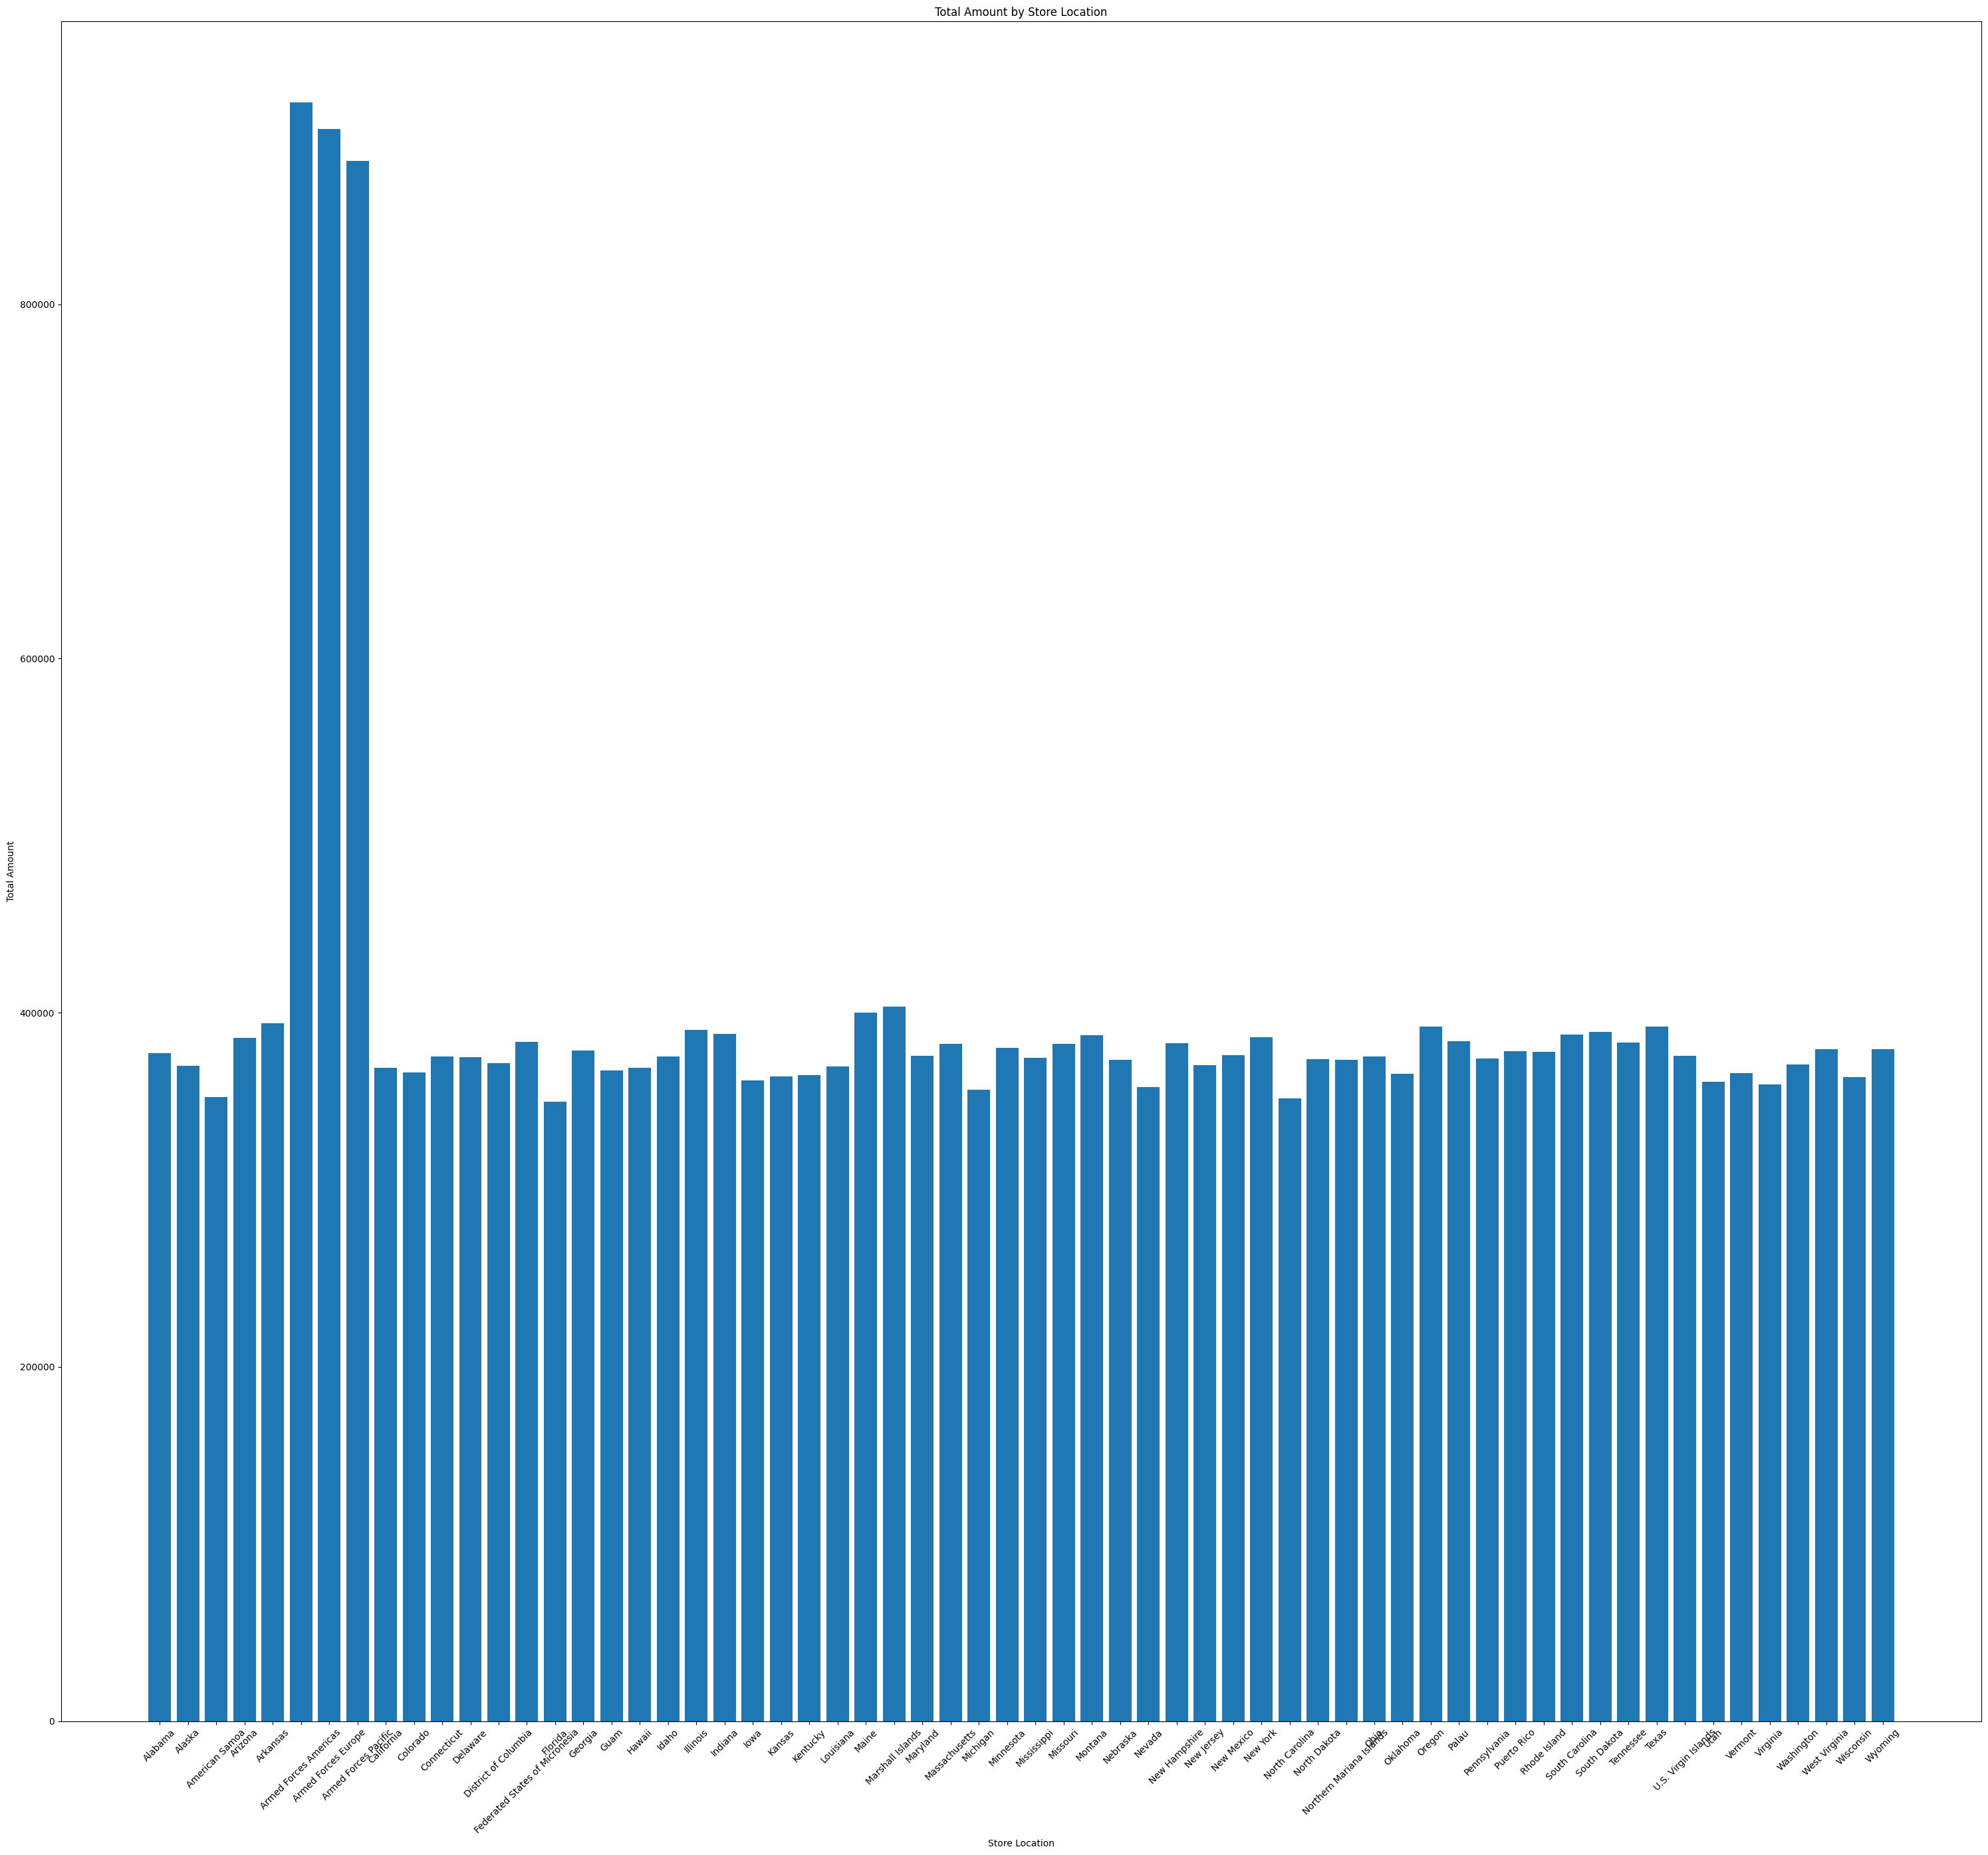

In [ ]:
bar_an = data.groupby('State')['TotalAmount'].sum().reset_index()

plt.figure(figsize=(30,28))
plt.bar(bar_an['State'], bar_an['TotalAmount'])
plt.xlabel('Store Location')
plt.ylabel('Total Amount')
plt.title('Total Amount by Store Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

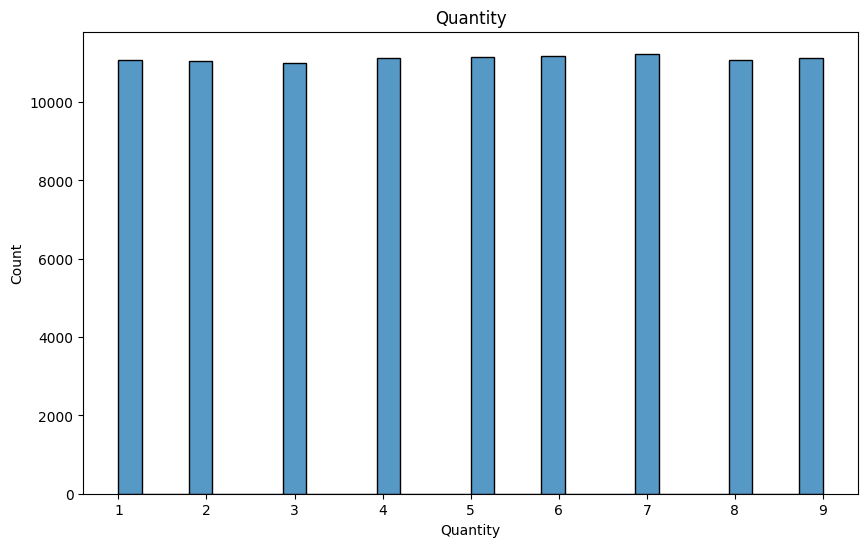

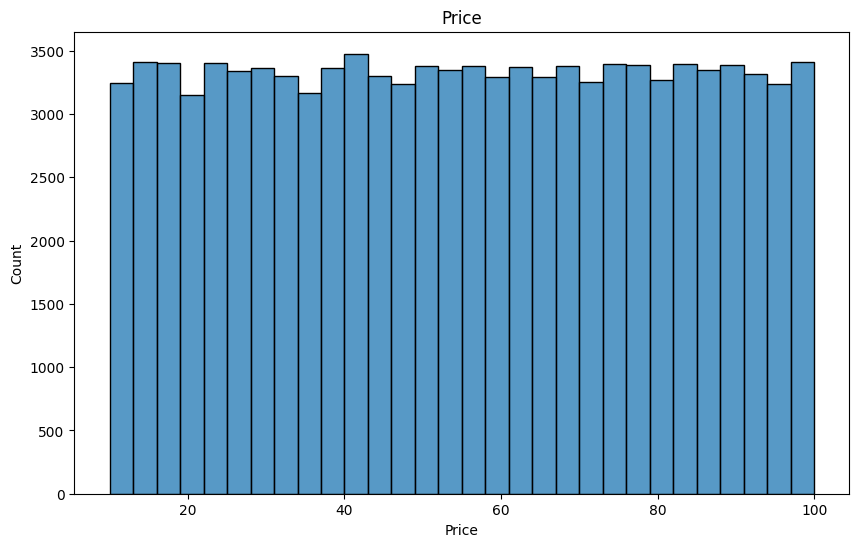

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Quantity'], bins=30)
plt.title('Quantity')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=30)
plt.title('Price')
plt.show()

In [126]:
data_clustering = data.groupby('CustomerID').agg({
    'TotalAmount': 'sum', 'Quantity': 'sum', 'DiscountApplied(%)': 'mean',  'ProductID': 'nunique', 'Price': 'mean', 'State': 'first', 'ProductCategory': lambda x: x.mode()[0] }).reset_index()

data_clustering.rename(columns={
    'TotalAmount': 'TotalAmountSpent',
    'Quantity': 'TotalQuantity', 'DiscountApplied(%)': 'AvgDiscountApplied', 'ProductID': 'UniqueProducts',
    'Price': 'AvgPrice'}, inplace=True)

In [127]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clustering[['TotalAmountSpent', 'TotalQuantity', 'AvgDiscountApplied', 'UniqueProducts', 'AvgPrice']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

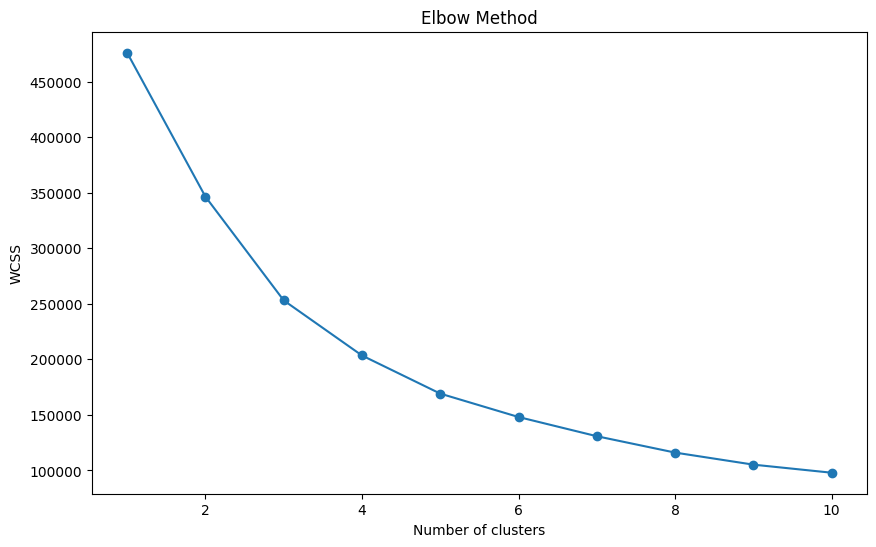

In [128]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [129]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data_clustering['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['TotalAmountSpent', 'TotalQuantity', 'AvgDiscountApplied', 'UniqueProducts', 'AvgPrice'])
print(cluster_centers_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   TotalAmountSpent  TotalQuantity  AvgDiscountApplied  UniqueProducts  \
0        487.917222       7.418783            9.594141        1.000000   
1        167.507220       2.620229           10.247388        1.000000   
2        130.670978       5.076294           10.158772        1.000000   
3        507.139585      10.208381           10.126189        2.017796   

    AvgPrice  
0  73.992302  
1  71.054980  
2  28.573190  
3  54.992345  


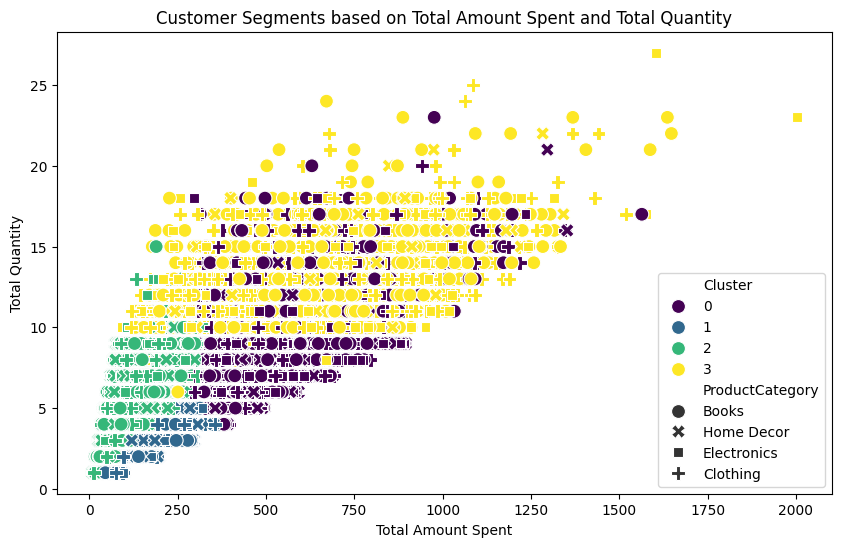

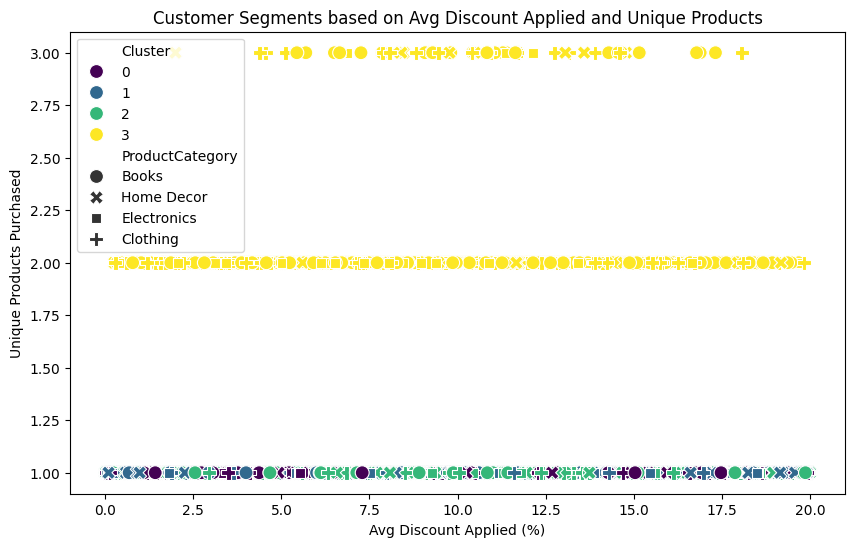

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clustering, x='TotalAmountSpent', y='TotalQuantity', hue='Cluster', style='ProductCategory', palette='viridis', s=100)
plt.title('Customer Segments based on Total Amount Spent and Total Quantity')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clustering, x='AvgDiscountApplied', y='UniqueProducts', hue='Cluster', style='ProductCategory', palette='viridis', s=100)
plt.title('Customer Segments based on Avg Discount Applied and Unique Products')
plt.xlabel('Avg Discount Applied (%)')
plt.ylabel('Unique Products Purchased')
plt.show()

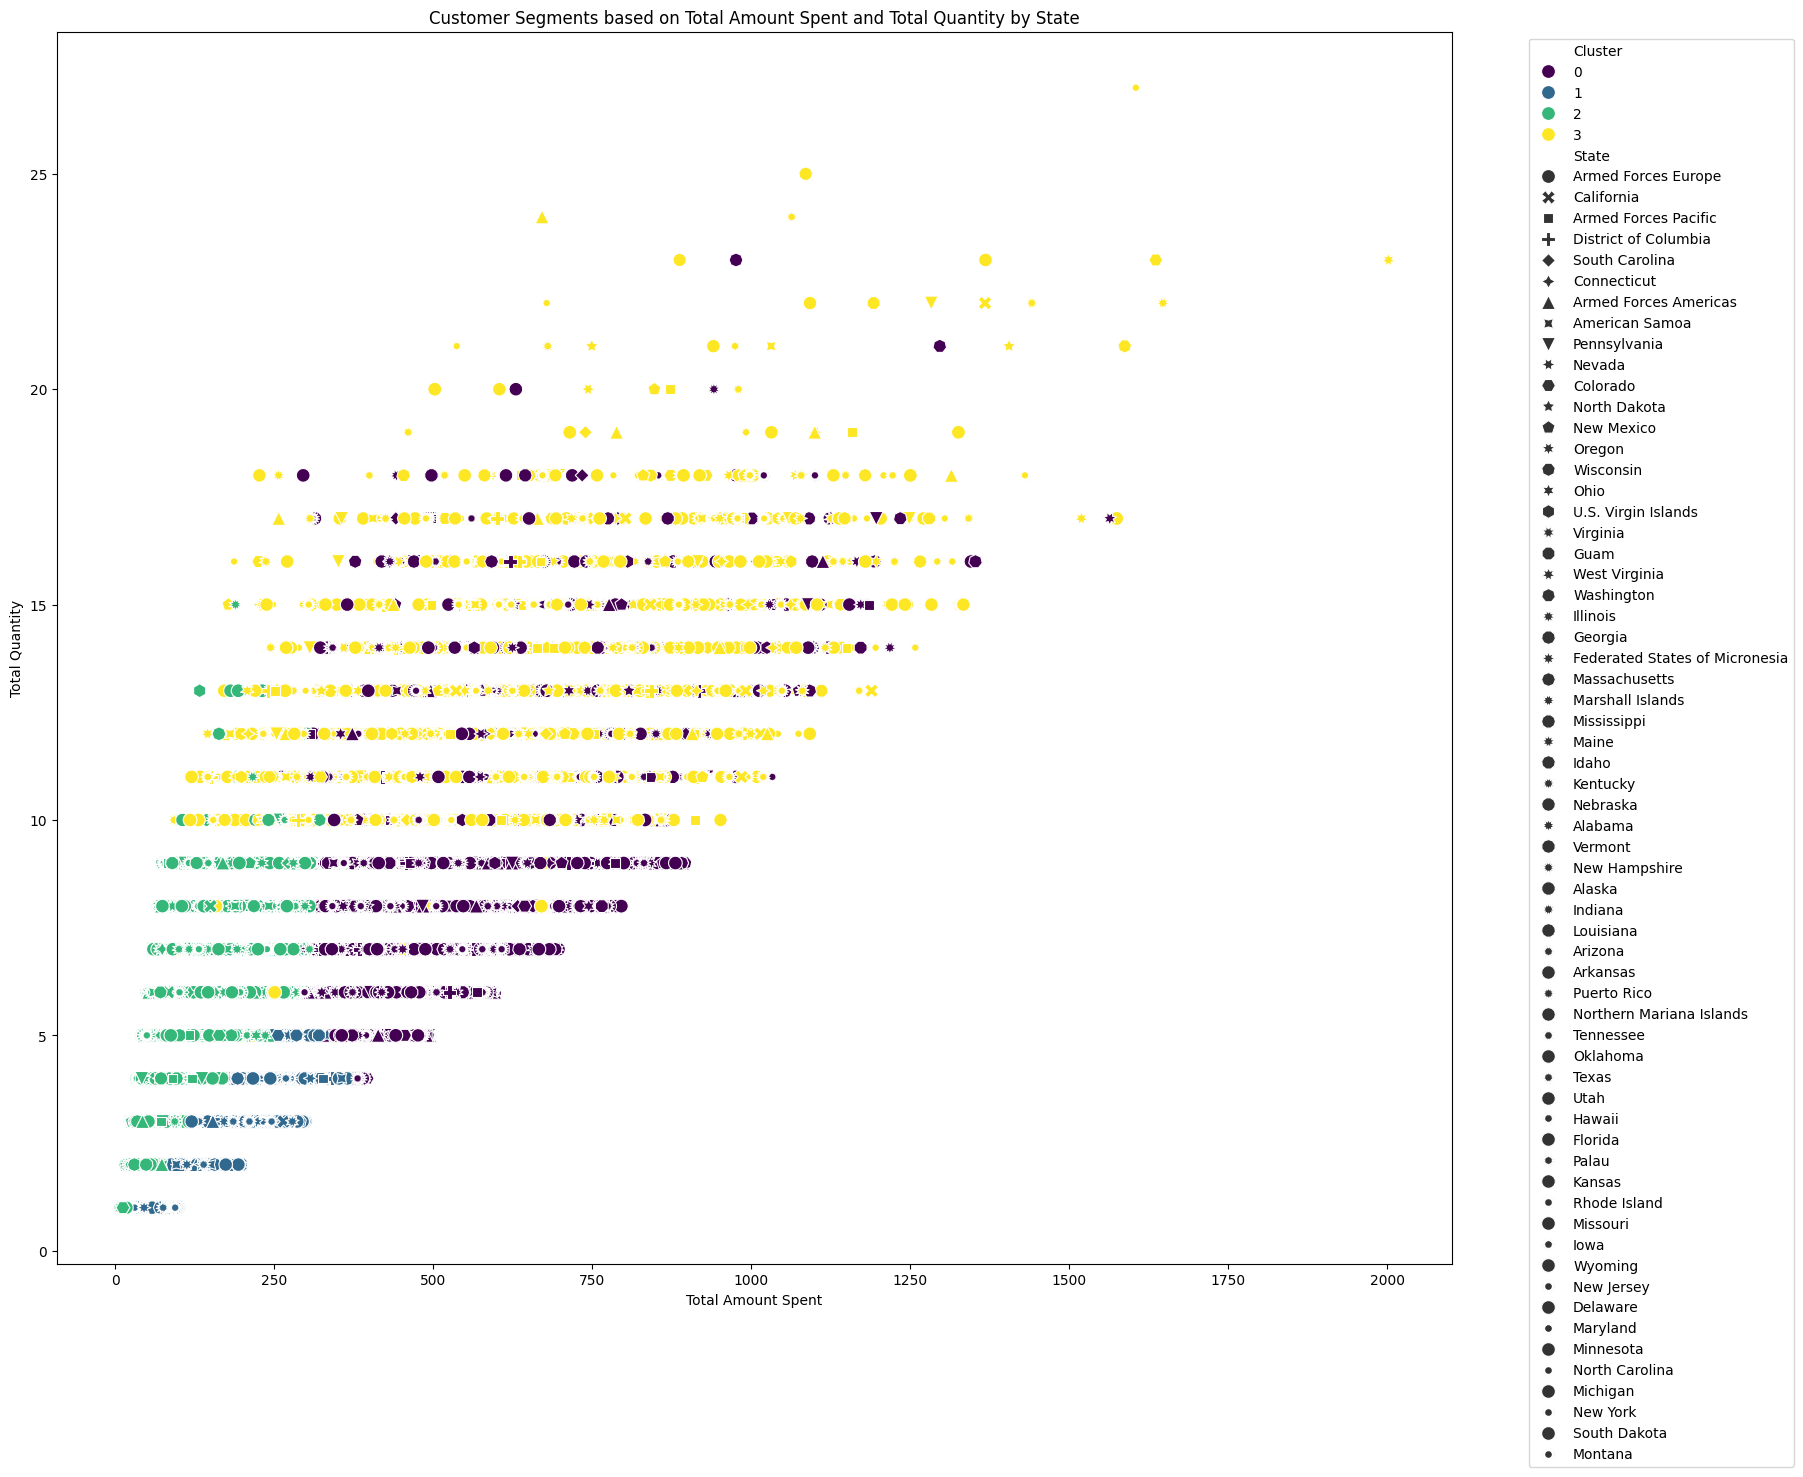

In [135]:
plt.figure(figsize=(18, 16))
sns.scatterplot(data=data_clustering, x='TotalAmountSpent', y='TotalQuantity', hue='Cluster', style='State', palette='viridis', s=100)
plt.title('Customer Segments based on Total Amount Spent and Total Quantity by State')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()